In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
dtypes = {'ip': np.uint32, 'app': np.uint16, 'device': np.uint8, 'os': np.uint8, 'channel': np.uint8, 'is_attributed': np.bool}

In [4]:
path = "C:/Users/Admin/Desktop/mnt/ssd/kaggle-talkingdata2/competition_files/"

train = pd.read_csv(path + "train_sample.csv", sep=',', dtype=dtypes, parse_dates=['click_time', 'attributed_time'])

In [50]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,241,2017-11-07 09:30:38,NaT,False
1,105560,25,1,17,3,2017-11-07 13:40:27,NaT,False
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,False
3,94584,13,1,13,221,2017-11-07 04:58:08,NaT,False
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,False


In [51]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint8
os                 100000 non-null uint8
channel            100000 non-null uint8
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null datetime64[ns]
is_attributed      100000 non-null bool
dtypes: bool(1), datetime64[ns](2), uint16(1), uint32(1), uint8(3)
memory usage: 2.5 MB


In [10]:
train.drop("attributed_time", axis=1, inplace=True)

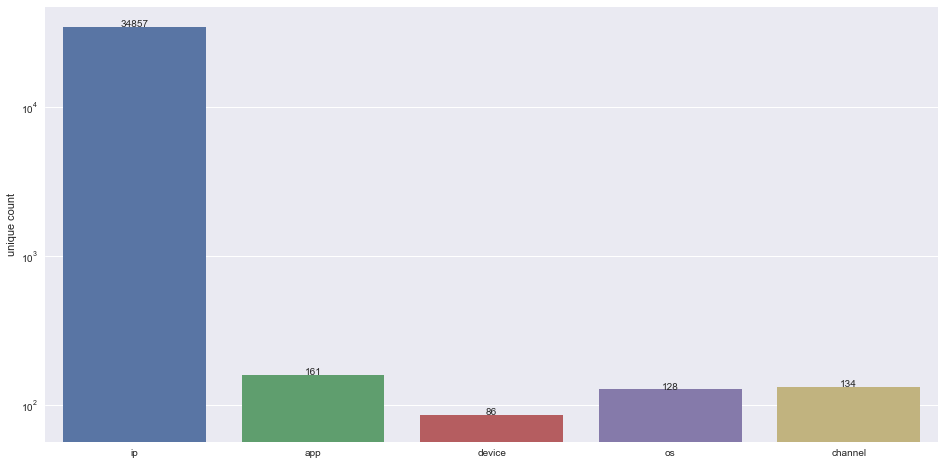

In [53]:
n=plt.figure(figsize=(16,8))
cols = ["ip", "app", "device", "os", "channel"]
uniques = [train[col].nunique() for col in cols]

ax = sns.barplot(cols, uniques, log=True)
ax.set_ylabel("unique count")
for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x() + p.get_width() / 2,
           p.get_height(),
           uniq,
           ha="center")

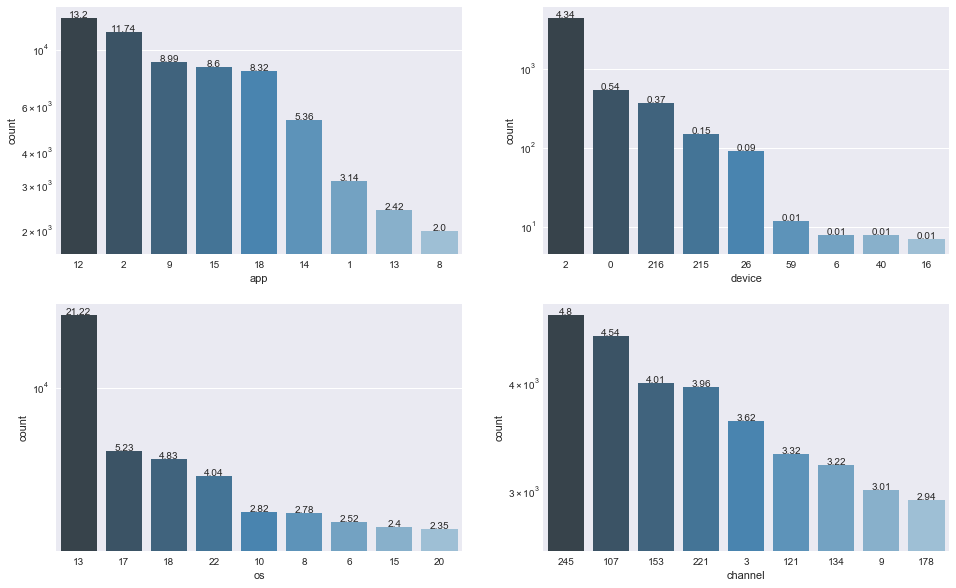

In [54]:
m=plt.figure(figsize=(16, 10))

for i, col in enumerate(["app","device","os","channel"]):
    counts = pd.value_counts(train[col].values, ascending=False)[1:10]
    indx = counts.index
    counts.reset_index(drop=True, inplace=True)
    
    plt.subplot(2,2,i+1)
    ax = sns.barplot(counts.index, counts.values, log=True, palette="Blues_d")
    ax.set_xticklabels(indx)
    ax.set_xlabel(col)
    ax.set_ylabel("count")
    
    for p, prop in zip(ax.patches, [round(100*val/len(train),2) for val in counts.values]):
        ax.text(p.get_x() + p.get_width() / 2,
               p.get_height(),
               prop,
               ha="center")

In [27]:
c=plt.figure(figsize=(16,8))

ip_uniq = pd.value_counts(train["ip"].values, ascending=False)[1:10]
ip_indx = ip_uniq.index
ip_uniq.reset_index(drop=True, inplace=True)

ax = sns.barplot(ip_uniq.index, ip_uniq.values, log=True, palette="Blues_d")
ax.set_xticklabels(ip_indx)
ax.set_xlabel("ip")
ax.set_ylabel("count")

for p, uniq in zip(ax.patches, [round(100*val/len(train), 3) for val in ip_uniq.values]):
    ax.text(p.get_x() + p.get_width() / 2,
           p.get_height(),
           uniq,
           ha="center")

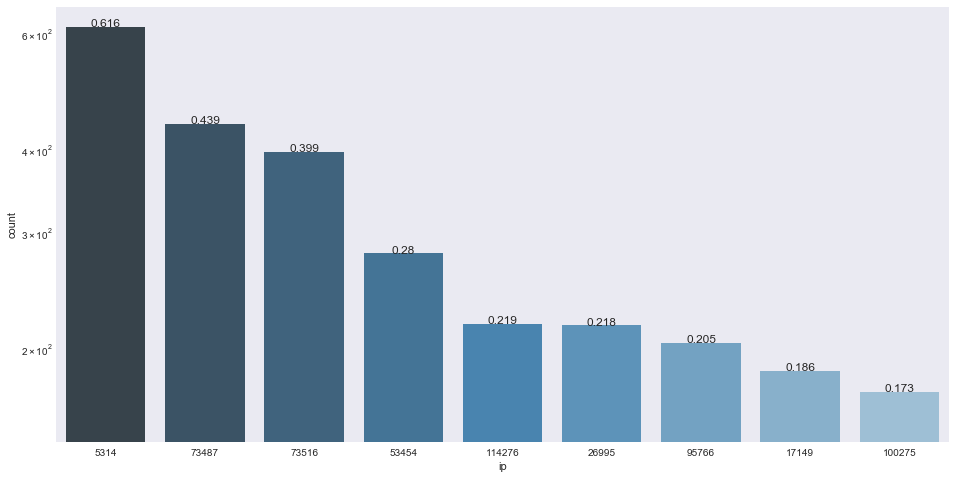

In [28]:
c


In [33]:
z=plt.figure(figsize=(8,5))

temp = train.groupby("is_attributed").size()
indx = temp.index
temp.reset_index(drop=True, inplace=True)
    
ax = sns.barplot(temp.index, temp.values, log=True)
ax.set_xticklabels(indx)
ax.set_xlabel("is_attributed")
ax.set_ylabel("count")

for p, count in zip(ax.patches, temp.values):
    ax.text(p.get_x() + p.get_width() / 2,
           p.get_height(),
           count,
           ha='center')

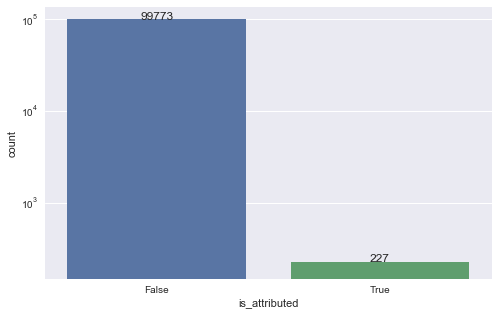

In [34]:
z

In [56]:

corr=train[cols].corr()



In [57]:
corr

,ip,app,device,os,channel
ip,1.000000,0.010400,0.000177,0.000054,0.001838
app,0.010400,1.000000,0.203279,0.186648,-0.032750
device,0.000177,0.203279,1.000000,0.564018,-0.030028
os,0.000054,0.186648,0.564018,1.000000,-0.017930
channel,0.001838,-0.032750,-0.030028,-0.017930,1.000000


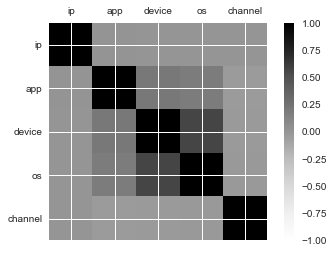

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train[cols])
ax.set_yticklabels(train[cols])
plt.show()

In [17]:
train2 = pd.read_csv(path + "train_sample.csv", sep=',')
train2.drop("attributed_time", axis=1, inplace=True)
train2.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,11/7/2017 9:30,0
1,105560,25,1,17,259,11/7/2017 13:40,0
2,101424,12,1,19,212,11/7/2017 18:05,0
3,94584,13,1,13,477,11/7/2017 4:58,0
4,68413,12,1,1,178,11/9/2017 9:00,0


In [36]:
# extract day and hour from click_time column
# add day and hour as new features
# as we 
day, hour = [], []
for time in train2["click_time"]:
    temp = time.split("/")[1]
    temp1 = time.split("/")[-1]
    temp2 = temp1.split(":")[0]
    day_tp, hour_tp = temp,temp2.split(" ")[-1]
    day.append(int(day_tp))
    hour.append(int(hour_tp))

train2["day"], train2["hour"] = day, hour

In [37]:
downloads = train2.groupby("hour").apply(lambda x: len(x[x.is_attributed == 1]))
clicks = train2.groupby("hour").apply(lambda x: len(x[x.is_attributed == 0]))

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.bar(clicks.index, clicks.values)
plt.xlabel("hour")
plt.ylabel("total clicks")

plt.subplot(122)
plt.bar(downloads.index, downloads.values)
plt.xlabel("hour")
plt.ylabel("total downloads")

In [38]:
def get_dayHour_data(is_attributed, click):
    temp = train2.groupby(["day","hour"]).apply(lambda x: len(x[x.is_attributed == is_attributed]))
    days = temp.index.get_level_values("day")
    hours = temp.index.get_level_values("hour")
    
    dayHour = []
    for day, hour in zip(days, hours):
        
        dayHour.append("/".join([str(day),str(hour) + 'H']))
    
    return pd.DataFrame({"dayHour":dayHour, click:temp.values}, index=np.arange(len(dayHour)))

clickDownload = get_dayHour_data(0,"clicks").merge(get_dayHour_data(1,"downloads"), how="outer", on="dayHour")

plt.figure(figsize=(16,8))

plt.plot(range(len(clickDownload)), clickDownload.clicks, color='red')
plt.plot(range(len(clickDownload)), clickDownload.downloads, color='blue')
plt.yscale("log")
plt.legend()

indx = [i for i in range(0, len(clickDownload), 5)]
plt.xticks([i for i in range(0, len(clickDownload), 5)], 
           clickDownload.dayHour.values[indx],
            rotation=45)

plt.xlabel("day-hour")
plt.ylabel("count for clicks and downloads")

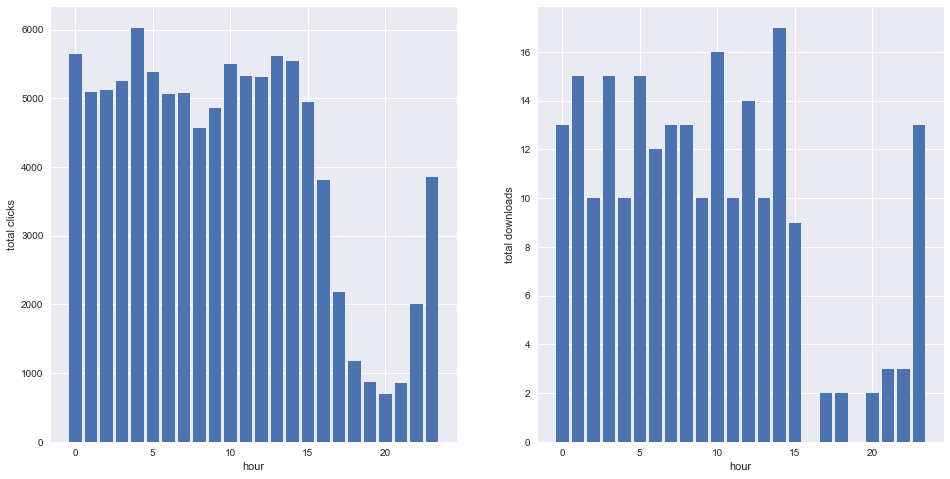

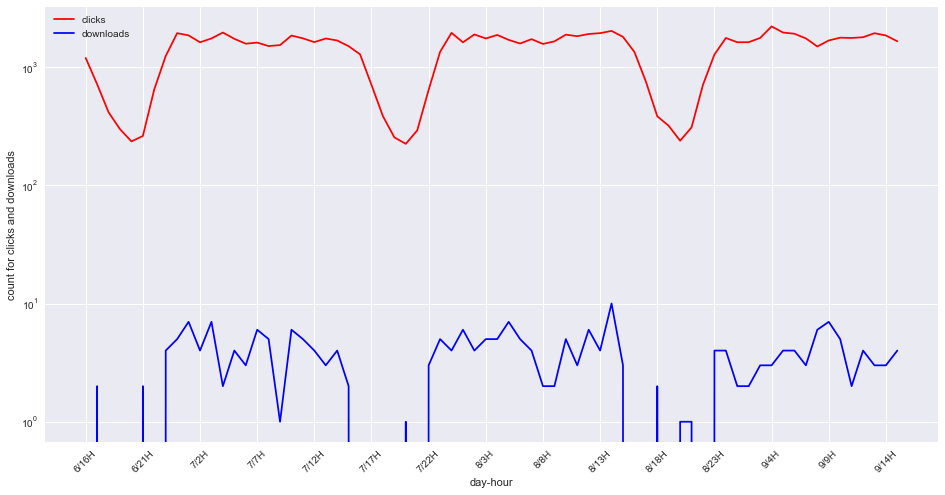

In [39]:
plt.show()